<a href="https://colab.research.google.com/github/ashishbaberwal/My-Projects/blob/main/Week_05_11_02_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Training...
Epoch [1/10], Loss: 0.0344
Epoch [2/10], Loss: 0.0233
Epoch [3/10], Loss: 0.0224
Epoch [4/10], Loss: 0.0219
Epoch [5/10], Loss: 0.0216
Epoch [6/10], Loss: 0.0212
Epoch [7/10], Loss: 0.0210
Epoch [8/10], Loss: 0.0208
Epoch [9/10], Loss: 0.0207
Epoch [10/10], Loss: 0.0206
Training Finished.


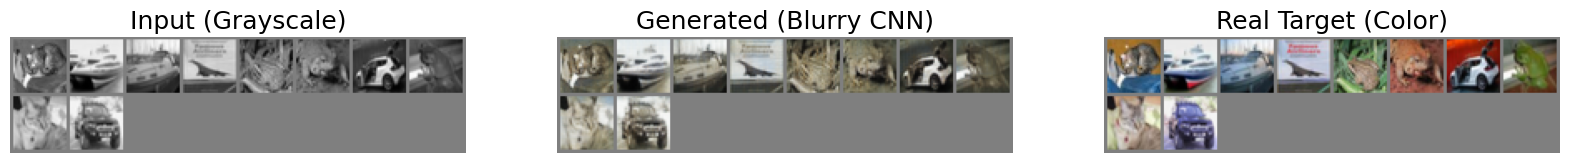

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Configuration
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10  # Kept low for demonstration; increase for better results
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==========================================
# 1. Load & Normalize Data [cite: 7, 8, 12, 13]
# ==========================================
transform = transforms.Compose([
    transforms.ToTensor(),
    # Normalize to [-1, 1] as requested in the lab
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Downloading CIFAR10
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                           download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10,
                                        shuffle=False)

# ==========================================
# 2. Define Encoder-Decoder CNN [cite: 4, 9]
# ==========================================
class EncoderDecoder(nn.Module):
    def __init__(self):
        super(EncoderDecoder, self).__init__()

        # Encoder: Compresses 32x32 image -> Latent representation
        # Input: 1 channel (Grayscale) -> Output: Latent features
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1), # 32x32 -> 16x16
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1), # 16x16 -> 8x8
            nn.ReLU()
        )

        # Decoder: Expands Latent -> 32x32 image
        # Input: Latent features -> Output: 3 channels (RGB Color)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1), # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # 16x16 -> 32x32
            nn.Tanh() # Tanh ensures output is between [-1, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = EncoderDecoder().to(DEVICE)

# ==========================================
# 3. Loss and Optimizer
# ==========================================
criterion = nn.MSELoss() # Using Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ==========================================
# 4. Training Loop
# ==========================================
print("Starting Training...")
for epoch in range(EPOCHS):
    running_loss = 0.0
    for data in train_loader:
        images, _ = data

        # Create Pair: Input (Grayscale) -> Target (Color)
        # We take the mean across channel dim to make it grayscale (1 channel)
        grayscale = torch.mean(images, dim=1, keepdim=True).to(DEVICE)
        targets = images.to(DEVICE) # Original color images

        optimizer.zero_grad()
        outputs = model(grayscale)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss/len(train_loader):.4f}')

print("Training Finished.")

# ==========================================
# 5. Visualize Results (Bigger Size)
# ==========================================
def imshow(img, title):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title, fontsize=18) # INCREASED FONT SIZE TOO
    plt.axis('off')

# Get batch
dataiter = iter(test_loader)
images, _ = next(dataiter)

# Prepare inputs
grayscale_input = torch.mean(images, dim=1, keepdim=True).to(DEVICE)

# Generate
with torch.no_grad():
    generated_color = model(grayscale_input).cpu()

# --- CHANGE IS HERE ---
# (Width, Height) in inches.
# Changed from (10, 4) to (20, 10) to make them much bigger.
plt.figure(figsize=(20, 10))
# ----------------------

# Show Grayscale Inputs
plt.subplot(1, 3, 1)
imshow(torchvision.utils.make_grid(grayscale_input.cpu()), "Input (Grayscale)")

# Show Generated Output
plt.subplot(1, 3, 2)
imshow(torchvision.utils.make_grid(generated_color), "Generated (Blurry CNN)")

# Show Real Targets
plt.subplot(1, 3, 3)
imshow(torchvision.utils.make_grid(images), "Real Target (Color)")

plt.show()

#Next Task

In [6]:
!pip install diffusers transformers accelerate torch

--- Multi-Prompt Generator (Running on cuda) ---


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--timbrooks--instruct-pix2pix/snapshots/31519b5cb02a7fd89b906d88731cd4d6a7bbf88d/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loaded image. Processing 11 prompts...

🎨 Generating 1/11: 'make me sit in open mountains'...


  0%|          | 0/40 [00:00<?, ?it/s]

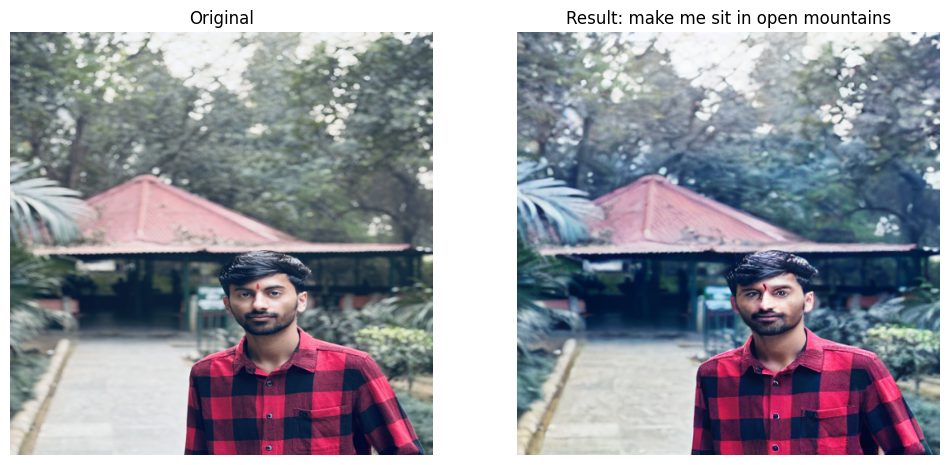

✅ Saved to output_0_make_me_si.png
----------------------------------------
🎨 Generating 2/11: 'make me sit in a modern classroom'...


  0%|          | 0/40 [00:00<?, ?it/s]

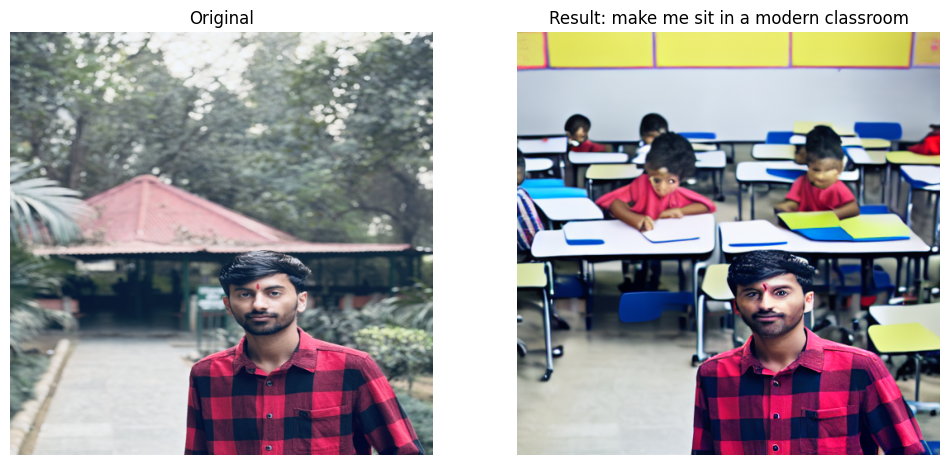

✅ Saved to output_1_make_me_si.png
----------------------------------------
🎨 Generating 3/11: 'turn the background into a cyberpunk city'...


  0%|          | 0/40 [00:00<?, ?it/s]

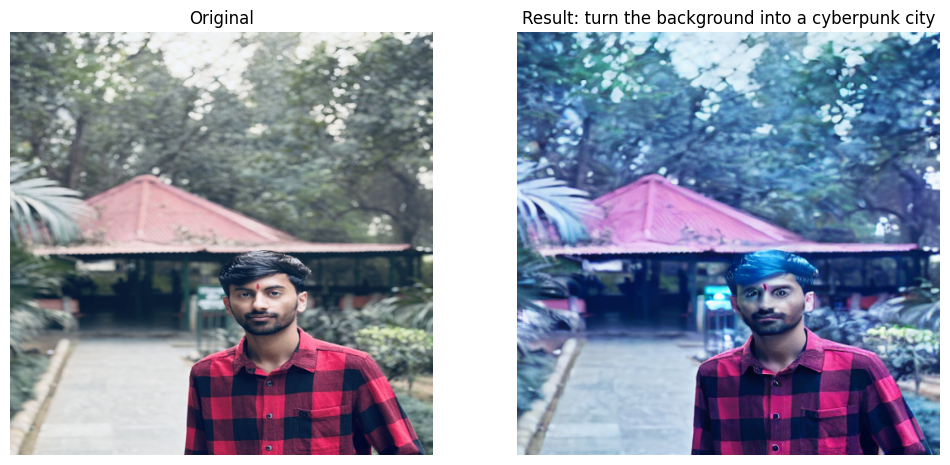

✅ Saved to output_2_turn_the_b.png
----------------------------------------
🎨 Generating 4/11: 'make it look like a pencil sketch'...


  0%|          | 0/40 [00:00<?, ?it/s]

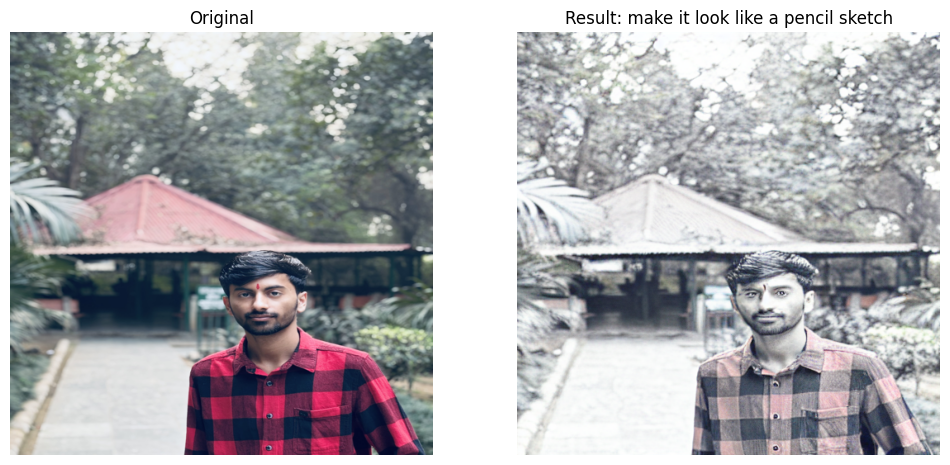

✅ Saved to output_3_make_it_lo.png
----------------------------------------
🎨 Generating 5/11: 'Make me fly through sahara desert'...


  0%|          | 0/40 [00:00<?, ?it/s]

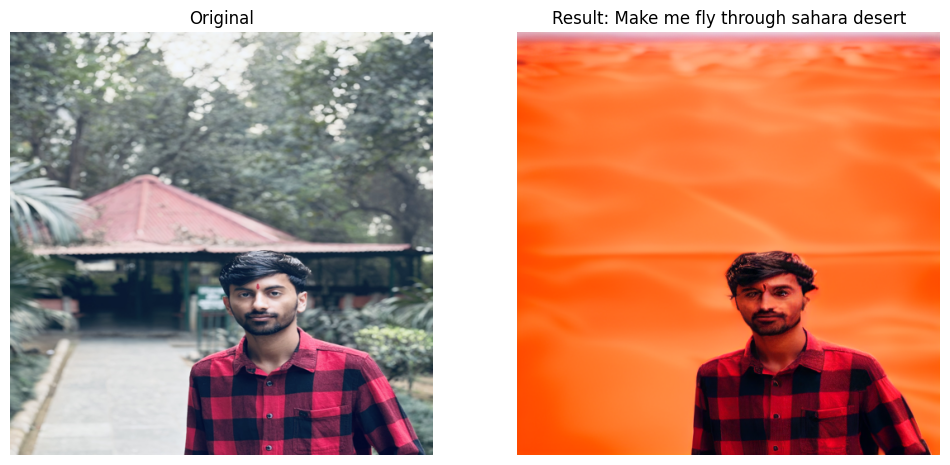

✅ Saved to output_4_Make_me_fl.png
----------------------------------------
🎨 Generating 6/11: 'Make 2 balloons grow on the head'...


  0%|          | 0/40 [00:00<?, ?it/s]

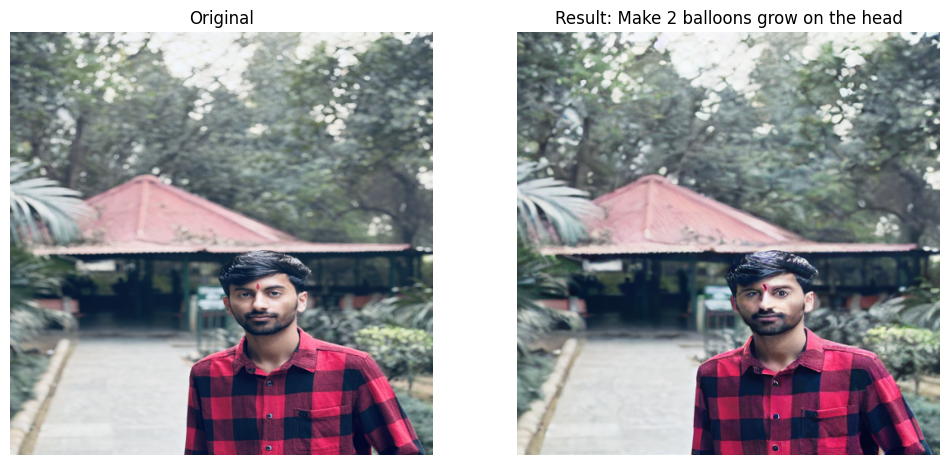

✅ Saved to output_5_Make_2_bal.png
----------------------------------------
🎨 Generating 7/11: 'Make me sit in cafe drinking coffee'...


  0%|          | 0/40 [00:00<?, ?it/s]

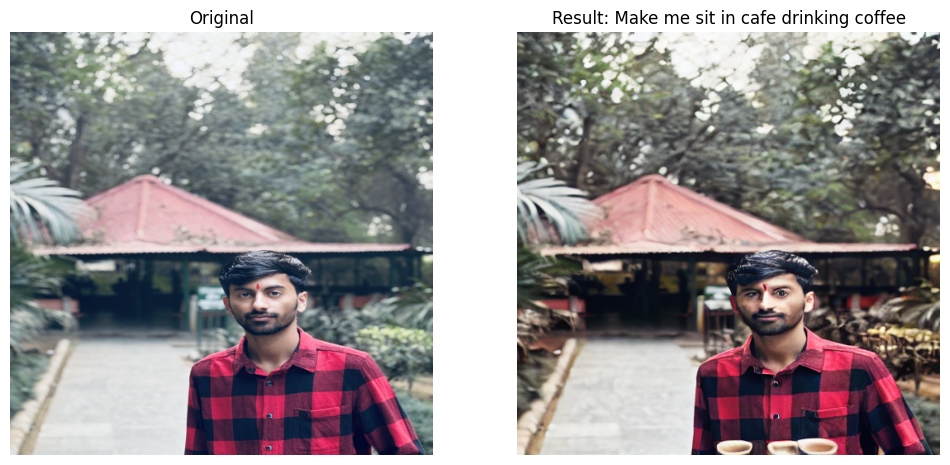

✅ Saved to output_6_Make_me_si.png
----------------------------------------
🎨 Generating 8/11: 'Make me study under the moon'...


  0%|          | 0/40 [00:00<?, ?it/s]

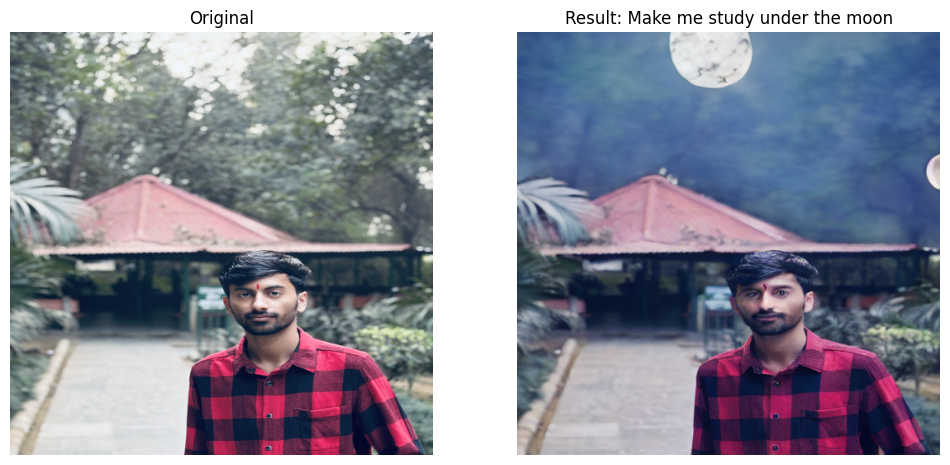

✅ Saved to output_7_Make_me_st.png
----------------------------------------
🎨 Generating 9/11: 'Make me hospitalized in hospital bned'...


  0%|          | 0/40 [00:00<?, ?it/s]

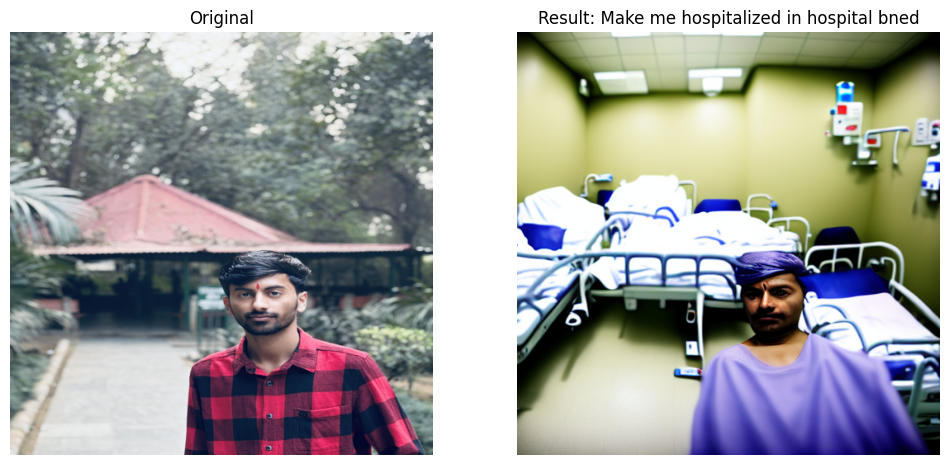

✅ Saved to output_8_Make_me_ho.png
----------------------------------------
🎨 Generating 10/11: 'Make me drive a supercar'...


  0%|          | 0/40 [00:00<?, ?it/s]

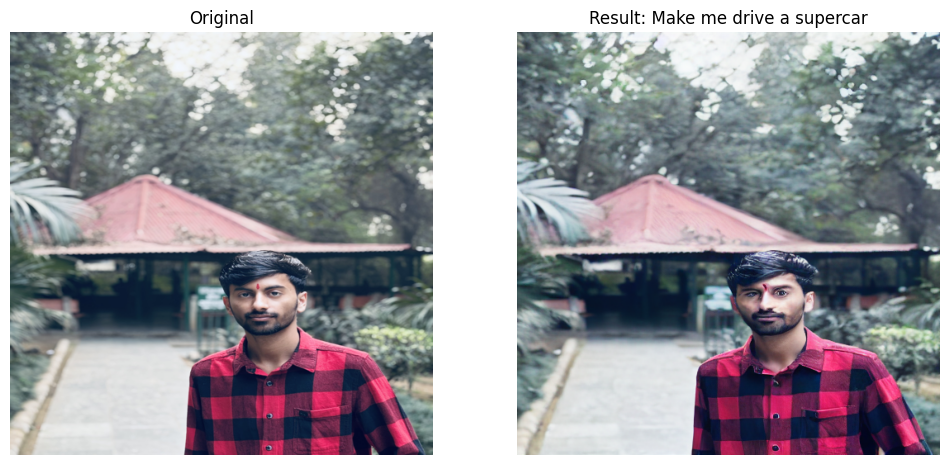

✅ Saved to output_9_Make_me_dr.png
----------------------------------------
🎨 Generating 11/11: 'Make me ride a superbike'...


  0%|          | 0/40 [00:00<?, ?it/s]

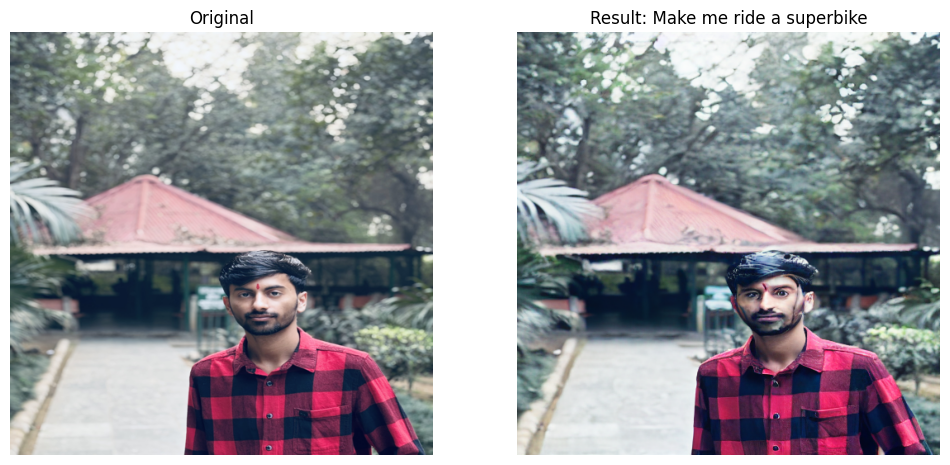

✅ Saved to output_10_Make_me_ri.png
----------------------------------------
All done!


In [7]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from PIL import Image
import matplotlib.pyplot as plt
import os

# ==========================================
# 1. USER SETTINGS
# ==========================================
INPUT_IMAGE = "input.jpg"  # Ensure this file exists in the folder

# List of prompts to generate
PROMPT_LIST = [
    "make me sit in open mountains",
    "make me sit in a modern classroom",
    "turn the background into a cyberpunk city",
    "make it look like a pencil sketch",
    "Make me fly through sahara desert",
    "Make 2 balloons grow on the head",
    "Make me sit in cafe drinking coffee",
    "Make me study under the moon",
    "Make me hospitalized in hospital bned",
    "Make me drive a supercar",
    "Make me ride a superbike"

]

# Tuning Knobs
IMAGE_STABILITY = 2  # 1.5 is balanced. Higher = keeps face better.
TEXT_STRENGTH = 10.0    # How strongly to apply the prompt.

# ==========================================
# 2. Setup Model & Hardware
# ==========================================
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

print(f"--- Multi-Prompt Generator (Running on {device}) ---")

# Load Model
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=dtype, safety_checker=None
).to(device)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# Load Input Image
if not os.path.exists(INPUT_IMAGE):
    print(f"❌ Error: Could not find '{INPUT_IMAGE}'.")
    exit()

original_image = Image.open(INPUT_IMAGE).convert("RGB")
original_image = original_image.resize((512, 512))

# ==========================================
# 3. The Loop (Generate & Display)
# ==========================================
print(f"Loaded image. Processing {len(PROMPT_LIST)} prompts...\n")

for i, prompt in enumerate(PROMPT_LIST):
    print(f"🎨 Generating {i+1}/{len(PROMPT_LIST)}: '{prompt}'...")

    # Generate
    with torch.no_grad():
        result = pipe(
            prompt,
            image=original_image,
            num_inference_steps=40,
            image_guidance_scale=IMAGE_STABILITY,
            guidance_scale=TEXT_STRENGTH
        ).images[0]

    # Save locally
    filename = f"output_{i}_{prompt[:10].replace(' ', '_')}.png"
    result.save(filename)

    # --- DISPLAY INLINE (The "There Only" Part) ---
    plt.figure(figsize=(12, 6))

    # Left: Original
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis("off")

    # Right: Generated
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.title(f"Result: {prompt}")
    plt.axis("off")

    plt.show() # <--- This forces the image to appear in the output immediately
    print(f"✅ Saved to {filename}\n" + "-"*40)

print("All done!")